## Step 1 : Import the necessary libraries

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Step 2 : Load the data

In [2]:
retail=pd.read_csv('cleaned_build_week_data.csv')

In [3]:
retail

,Order_Date,Customer_ID,Country,UnitPrice,Quantity,TotalPrice,Order_ID
0,2019-01-01,BM-11575,United States,73.94,1,28.2668,1
1,2019-01-02,BM-11575,United States,173.94,3,38.2668,2
2,2019-01-02,BM-11575,United States,231.98,2,67.2742,3
3,2019-01-03,LR-16915,United States,114.46,2,28.6150,4
4,2019-01-03,CA-12310,United States,30.08,2,-5.2640,5
...,...,...,...,...,...,...,...
8995,2009-12-02,13564.0,United Kingdom,3.95,2,7.9000,8996
8996,2009-12-02,13564.0,United Kingdom,4.95,2,9.9000,8997
8997,2009-12-02,13564.0,United Kingdom,5.95,2,11.9000,8998
8998,2009-12-02,13564.0,United Kingdom,3.75,3,11.2500,8999


In [4]:
# check the shape
retail.shape

(9000, 7)

##  Step 3: Statistical analysis

In [5]:
# lets get the info
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Order_Date   9000 non-null   object 
 1   Customer_ID  9000 non-null   object 
 2   Country      9000 non-null   object 
 3   UnitPrice    9000 non-null   float64
 4   Quantity     9000 non-null   int64  
 5   TotalPrice   9000 non-null   float64
 6   Order_ID     9000 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 492.3+ KB


In [6]:
# lets get the description of the data
retail.describe()

,UnitPrice,Quantity,TotalPrice,Order_ID
count,9000.000000,9000.000000,9000.000000,9000.000000
mean,125.030823,6.637778,30.784208,4500.500000
std,381.447463,19.670989,176.311091,2598.220545
min,0.100000,-150.000000,-6599.978000,1.000000
25%,3.750000,2.000000,3.804800,2250.750000
50%,17.250000,3.000000,10.500000,4500.500000
75%,88.000000,6.000000,25.178500,6750.250000
max,9450.000000,800.000000,8399.976000,9000.000000


In [8]:
retail.dtypes

Order_Date      object
Customer_ID     object
Country         object
UnitPrice      float64
Quantity         int64
TotalPrice     float64
Order_ID         int64
dtype: object

In [9]:
# lets convert order_date column object type to date type
retail['Order_Date']=pd.to_datetime(retail['Order_Date'])

In [10]:
retail.dtypes

Order_Date     datetime64[ns]
Customer_ID            object
Country                object
UnitPrice             float64
Quantity                int64
TotalPrice            float64
Order_ID                int64
dtype: object

## Step 4 : Data visualization

### 1.Time series line plot: Monthly sales trend

In [11]:
# lets analyse the monthly sales trend
retail['Order_month']=retail['Order_Date'].dt.to_period('M')

In [21]:
monthly_trend=retail.groupby(retail['Order_month'])['TotalPrice'].sum().sort_values(ascending=False)[:100]

In [27]:
monthly_trend

Order_month
2009-12    66070.3500
2019-12    17885.3093
2019-10    16243.1425
2019-09     9328.6576
2019-05     8662.1464
              ...    
2013-04      817.4498
2011-01      772.0226
2012-06      692.4475
2012-01      503.3377
2011-02      128.6189
Freq: M, Name: TotalPrice, Length: 64, dtype: float64

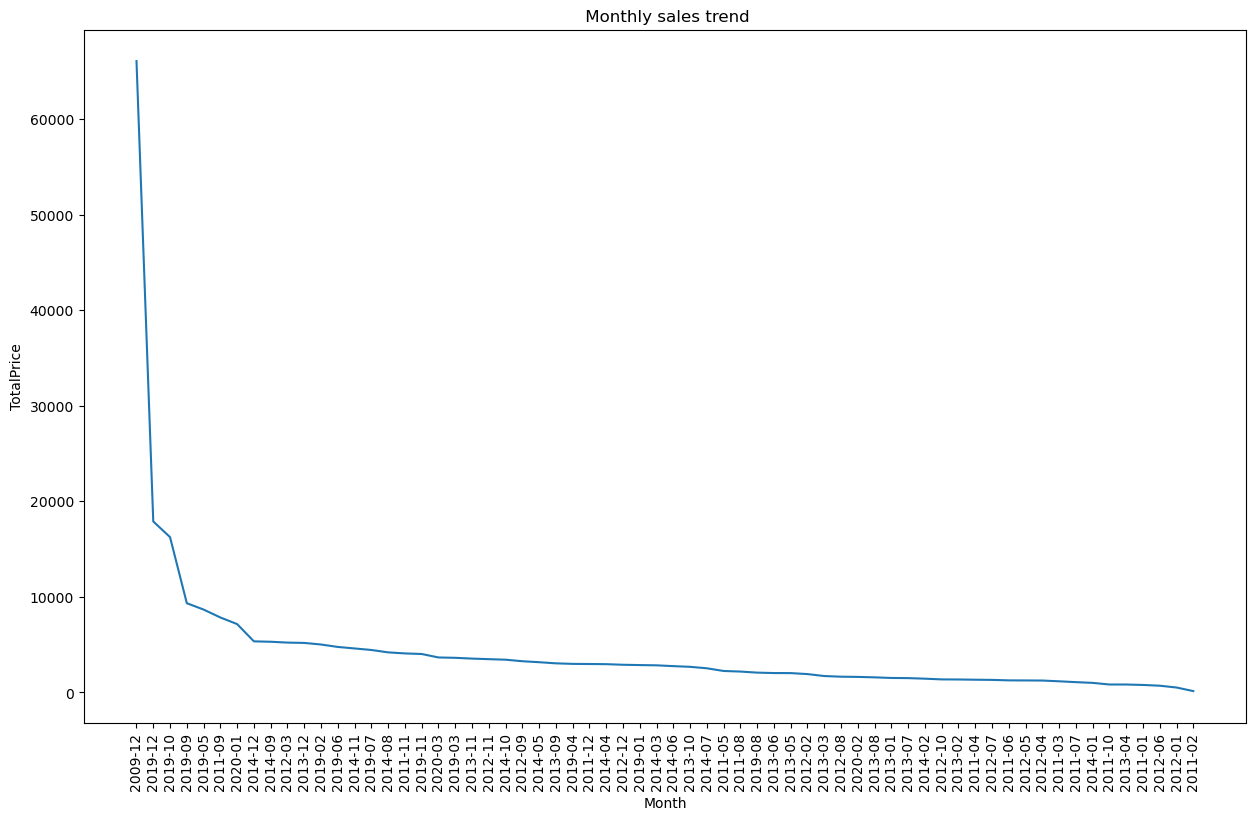

In [76]:
# lets visualize the monthly trend
plt.figure(figsize=(15,9))
sns.lineplot(x=monthly_trend.index.astype(str),y=monthly_trend.values)
plt.xlabel('Month')
plt.ylabel('TotalPrice')
plt.title(' Monthly sales trend')
plt.xticks(rotation=90)
plt.savefig("monthly trend.png")
plt.show()

### Insights:

From the analysis, we observed a significant increase in sales starting from December 2009, with a peak reaching approximately 70,000. However, in the following months and years, there was a gradual decline in total sales.

To potentially boost future sales, the following strategies could be considered:

1.Offering more competitive pricing to attract price-sensitive customers.

2.Increasing discounts during off-peak periods to drive volume.

3.Recommending high-rated products to customers based on past preferences and reviews, leveraging recommendation systems.

## 2 Bar chart: Top countries by revenue

In [34]:
revenue_by_countries=retail.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

In [35]:
revenue_by_countries

Country
United States     210987.5257
United Kingdom     59827.7300
Portugal            2454.6800
EIRE                1800.4300
France               995.3400
Germany              929.9200
USA                  141.0000
Belgium              130.0000
Australia              0.0000
Japan               -208.7500
Name: TotalPrice, dtype: float64

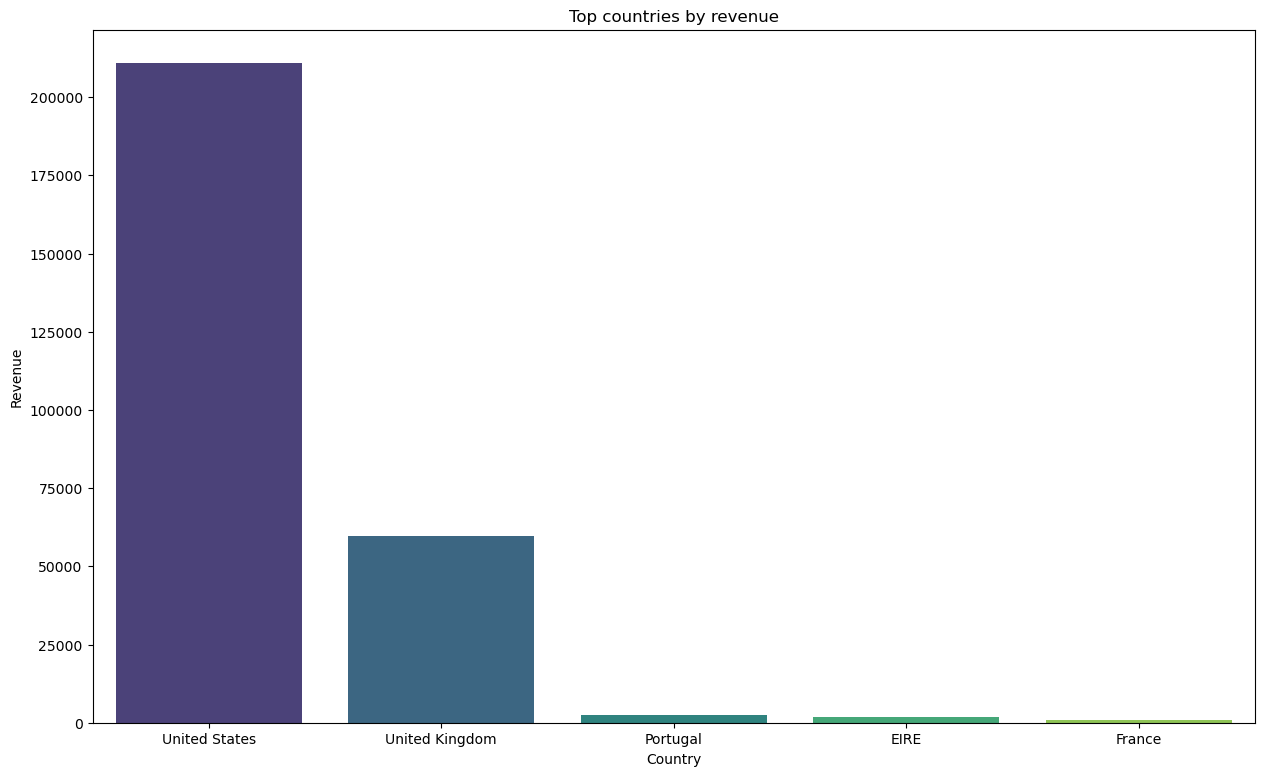

In [77]:
# lets visualize top trending countries in revenue
plt.figure(figsize=(15,9))
sns.barplot(revenue_by_countries[:5],palette='viridis')
plt.ylabel('Revenue')
plt.title('Top countries by revenue')
plt.savefig("top trending countries in revenue.png")
plt.show()

### Insights:

From the analysis, the United States emerges as the top country in terms of revenue, indicating a strong customer base and purchasing power. In contrast, France ranks at the bottom among the selected countries, reflecting lower overall sales performance.



## 3 Pie chart: Contribution of top 5 customers

In [47]:
# lets analyse the contribution by number of orders
contributors=retail.groupby('Customer_ID')['Order_ID'].count().sort_values(ascending=False)[:5]

In [48]:
contributors

Customer_ID
16393.0    130
15998.0    104
17611.0     83
12758.0     79
15542.0     74
Name: Order_ID, dtype: int64

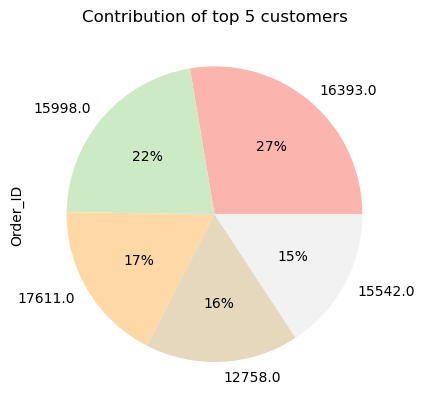

In [80]:
contributors.plot(kind='pie',autopct='%d%%',colormap='Pastel1')
plt.title('Contribution of top 5 customers')
plt.savefig('top5_customers.png')

## Insights:
From the analysis, the contribution of the top 5 customers to total orders is visualized above.
Customer ID 16393 contributed the most, accounting for 27% of the total orders, while Customer ID 15542 had the lowest contribution at 15%.

## 4 Heatmap: Sales by month and country

In [63]:
# lets extract month from the orderdate
retail['month']=retail['Order_Date'].dt.month

In [70]:
monthly_sales_by_country=retail.groupby(['month','Country'])['TotalPrice'].sum().unstack().fillna(0)

In [71]:
monthly_sales_by_country

Country,Australia,Belgium,EIRE,France,Germany,Japan,Portugal,USA,United Kingdom,United States
month,,,,,,,,,,
1,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,13760.7248
2,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,11427.9293
3,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,18152.7849
4,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,9297.1384
5,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,17305.3735
6,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,11454.1594
7,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,10804.1878
8,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,11623.1466
9,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,28746.0543


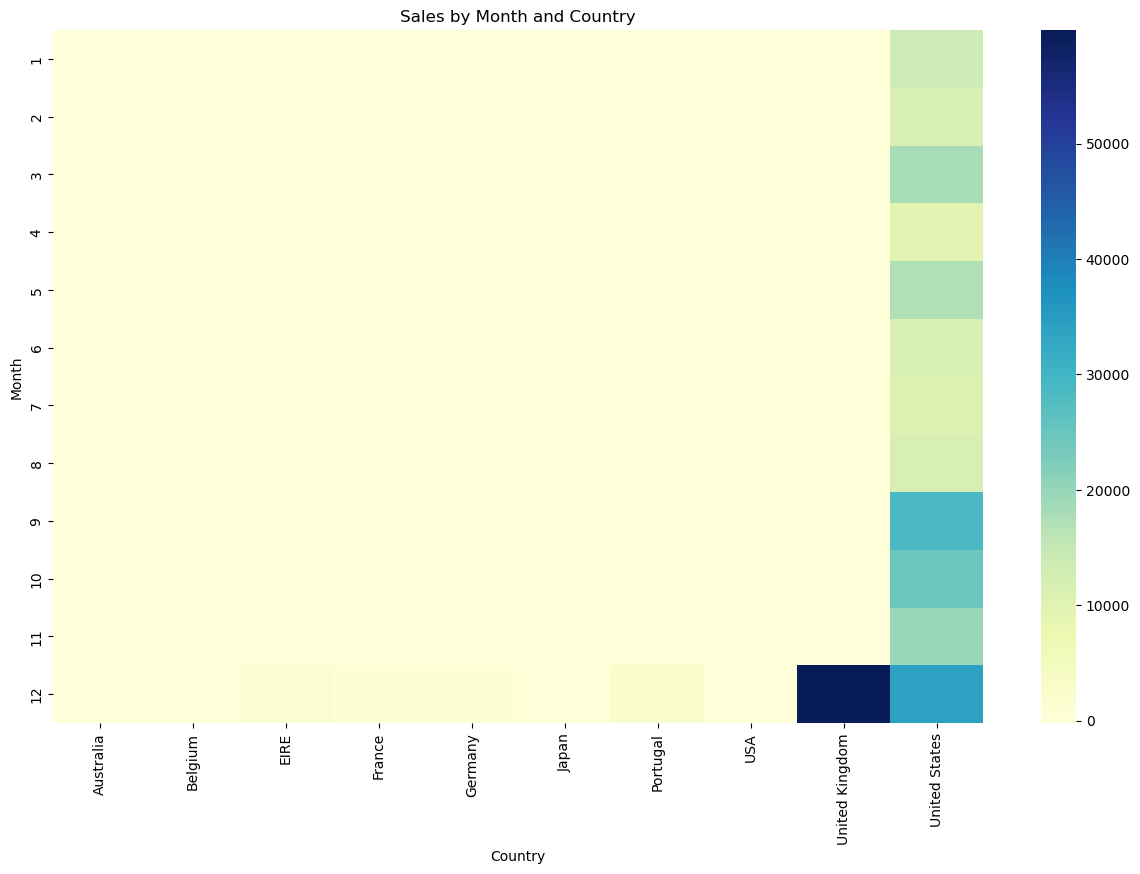

In [79]:
# lets visualize the data by using heatmap
plt.figure(figsize=(15,9))
sns.heatmap(monthly_sales_by_country, cmap='YlGnBu')
plt.title('Sales by Month and Country')
plt.xlabel('Country')
plt.ylabel('Month')
plt.savefig('Sales by Month and Country.png')
plt.show()

## Insights

From the above analysis, the United States consistently contributed the highest sales across every month.
However, in December, the United Kingdom experienced a significant spike in sales, contributing the highest sales for that month.
The remaining countries lagged behind in comparison.



##  Conclusion:
1 **Sales Trends:**
We observed a significant increase in sales starting from December 2009, peaking at approximately 70,000. However, this growth was followed by a gradual decline in the following months and years. To boost future sales, strategic actions such as price reductions, offering more discounts, or promoting high-rated products could be beneficial.

2 **Top Contributing Countries:**
The United States consistently ranked as the top contributor to sales across all months. In contrast, France showed the lowest sales revenue. In December, the United Kingdom saw a spike, emerging as the highest contributor for that month.

3 **Top Customers:**
The top 5 customers made notable contributions to the overall sales. Customer ID 16393 was the highest contributor, accounting for 27% of the total orders, while Customer ID 15542 had the smallest contribution at 15%. This insight could help target top customers with personalized offers or loyalty programs.

4 **Monthly and Country-wise Sales Distribution:**
The United States led in sales every month, while the United Kingdom dominated in December. Other countries followed at a distance. Identifying seasonal trends and focusing marketing efforts on high-performing countries during peak months could maximize revenue.

